Pizza is one of the most popular foods in the world,and understanding the patterns in pizza orders can provide valuable insights for businesses.In this notebook ,we will wxplore a dataset of pizza orders to uncover interesting trends and potentially build a predictive models to forecast future orders.

# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
order_details=pd.read_csv('order_details.csv')
orders=pd.read_csv('orders.csv')
pizza_types=pd.read_csv('pizza_types.csv',encoding = 'unicode_escape') # for utf-8 use encoding = 'unicode_escape
pizzas=pd.read_csv('pizzas.csv')

#### Data overviwe

Let's take a queek look at the structure of each dataset.

In [12]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [13]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [15]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [16]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


#### Data cleaning and Preprocessing

We need to ensure that the data is clean and properly formatted before we can perform any analysis.

In [20]:
# convert date and time columns to datetime

orders['datetime'] = pd.to_datetime(orders['date'] + ' ' + orders['time'])
orders.drop(columns=['date','time'],inplace=True)

#### Exploratory Data analysis (EDA)

Let's explore the data to find interesting trend and patterns.

In [21]:
# Merge dataframes for comprehensive analysis

merged_df = order_details.merge(orders, on = 'order_id')
merged_df = merged_df.merge(pizzas, on = 'pizza_id')
merged_df = merged_df.merge(pizza_types, on = 'pizza_type_id')

In [32]:
merged_df.info

<bound method DataFrame.info of        order_details_id  order_id       pizza_id  quantity  \
0                     1         1     hawaiian_m         1   
1                     2         2  classic_dlx_m         1   
2                     3         2  five_cheese_l         1   
3                     4         2    ital_supr_l         1   
4                     5         2     mexicana_m         1   
...                 ...       ...            ...       ...   
48615             48616     21348  ckn_alfredo_m         1   
48616             48617     21348  four_cheese_l         1   
48617             48618     21348   napolitana_s         1   
48618             48619     21349     mexicana_l         1   
48619             48620     21350      bbq_ckn_s         1   

                 datetime pizza_type_id size  price  \
0     2015-01-01 11:38:36      hawaiian    M  13.25   
1     2015-01-01 11:57:40   classic_dlx    M  16.00   
2     2015-01-01 11:57:40   five_cheese    L  18.50   
3  

In [34]:
merged_df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
datetime            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [35]:
merged_df.columns.tolist()

['order_details_id',
 'order_id',
 'pizza_id',
 'quantity',
 'datetime',
 'pizza_type_id',
 'size',
 'price',
 'name',
 'category',
 'ingredients']

In [37]:
merged_df.describe()

,order_details_id,order_id,quantity,datetime,price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-30 03:28:34.933833984,16.494132
min,1.000000,1.000000,1.000000,2015-01-01 11:38:36,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 15:34:31,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 19:50:30,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 18:39:55,20.250000
max,48620.000000,21350.000000,4.000000,2015-12-31 23:02:05,35.950000
std,14035.529381,6180.119770,0.143077,NaN,3.621789


<Axes: >

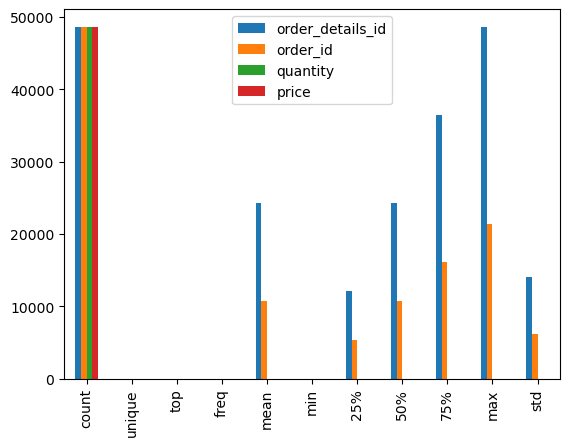

In [38]:
merged_df.describe(include='all').plot(kind='bar')

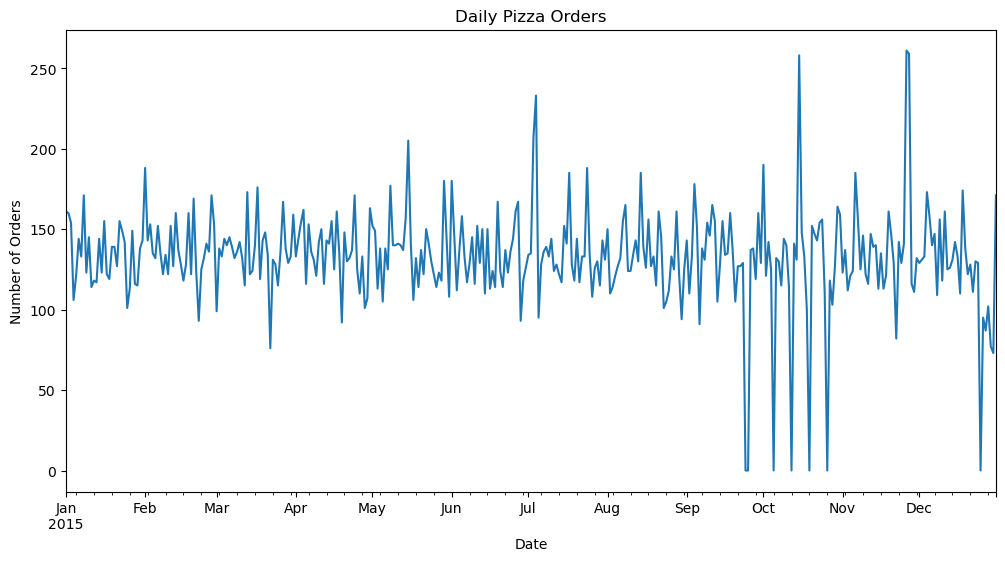

In [22]:
# plot the distribution of pizza orders over time

plt.figure(figsize=(12,6))
merged_df.set_index('datetime').resample('D').size().plot()
plt.title('Daily Pizza Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

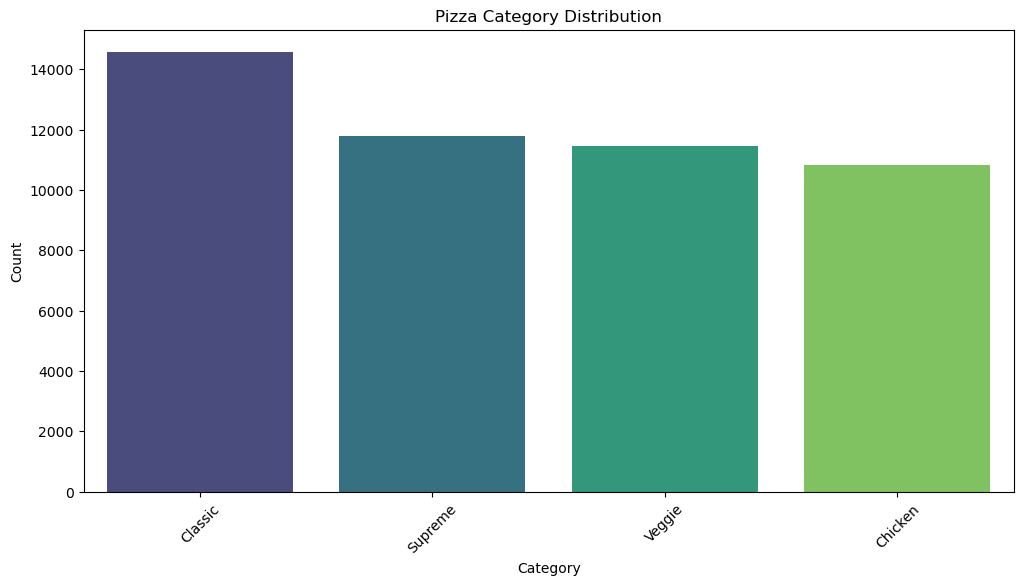

In [23]:
# plot the distribution of pizza categories

plt.figure(figsize=(12,6))
sns.countplot(data=merged_df,x='category', order=merged_df['category'].value_counts().index, palette ='viridis')
plt.title('Pizza Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Correlation Analysis

Let's see if there are any interesting correlations in numeric data.

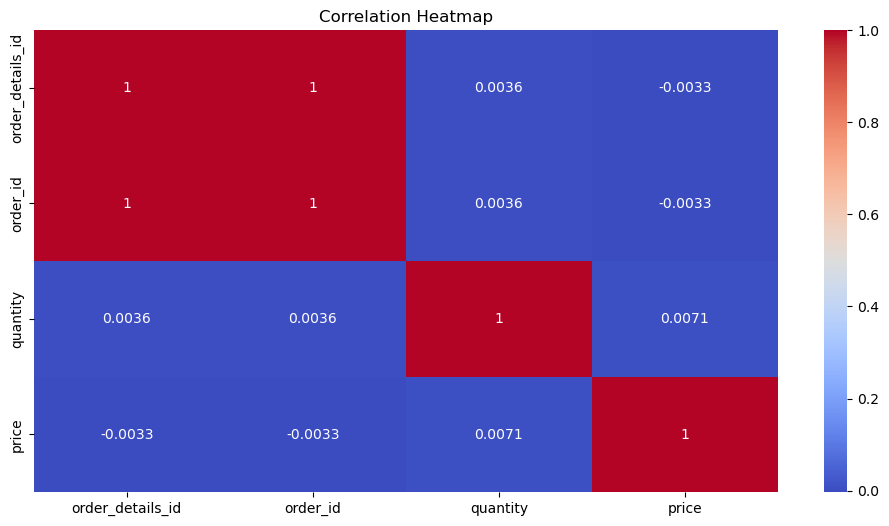

In [24]:
# select only Numeric columns

numeric_df = merged_df.select_dtypes(include=[np.number])

#Plot the correlation heatmap

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Predictive Modeling

Based on the data, it might be useful to predict the quantity of pizzas ordered.Let's build a simple linear aggreation model to predict the quantity of pizzas orderas based on the availbale features.

In [31]:
#prepare the data for modeling

x = merged_df[['price']]
y = merged_df['quantity']

# split the data into trainning and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

#Train the model
model = LinearRegression()
model.fit(x_train,y_train)

#Make Predictions
y_pred = model.predict(x_test)

#Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.021608763560040784, 2.8360825330198125e-05)

#### Future Analysis

There are many other interesting analyses we could perform with this data.For example, we could:

* Analyze the impact of different ingredients on pizza popularity
* Predict the total revenue based on histrocial data
* Explore seasonal trends in pizza orders